### MAP556, Ecole Polytechnique, 2022-23

# TP 3 - Réduction de variance par échantillonage d'importance

### Exercice.  Echantillonnage d'importance

On considère $Y$ de loi gaussienne centrée réduite. On souhaite évaluer l'espérance $\mathbb E \left[ g(Y) \right]$ à partir de simulations, dans la situation où $g(y)=(y-2)^+$.


####  Question 1
__Valeur exacte de l'espérance__ : on pourra évaluer par intégration numérique déterministe (quadrature) les valeurs de $\mathbb{E}\bigl[g(Y)\bigl]$ et $\mbox{Var}(g(Y))$, avant de les évaluer par la méthode Monte Carlo.

On pourra utiliser la fonction `scipy.integrate.quad` : vérifier dans la documentation de la fonction ses variables d'entrée 
et de sortie.

Tracer les trajectoires des moyennes empiriques $I_n = \frac 1 n \sum_{i=1}^n (Y_i - 2)^+$ obtenues à partir de $n$ copies indépendantes $(Y_i)_{1 \le  i \le n}$ de $Y$, puis l'histogramme des erreurs pour $n$ fixé.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spint

Esp_gY = 0.00849  Var_gY = 0.0057 

mean = 0.0097  var = 0.0077
Intervalle de confiance 95% pour E[g(Y)] = [ 0.0058 , 0.0135 ] 

erreur relative = 0.40


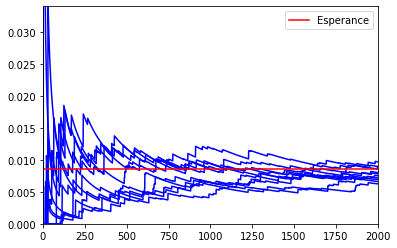

In [2]:
# densite Gaussienne standard
def densiteGaussienne (x) :
    return np.exp(-x**2./2.) / np.sqrt(2.*np.pi)

# fonction g
def g(x):
    return np.maximum(x-2.,0.)

def integrand(x):
    return g(x)*densiteGaussienne(x)

def integrand_sq(x):
    return g(x)**2*densiteGaussienne(x)

############################################
# Calculer E[g(Y)] et Var[g(Y)] avec quadrature
# numerique (par ex. scipy.integrate.quad )
Esp_gY = spint.quad(integrand,-np.inf,np.inf)[0]
Var_gY = spint.quad(integrand_sq,-np.inf,np.inf)[0]-(spint.quad(integrand,-np.inf,np.inf)[0])**2

print("Esp_gY = %1.5f  Var_gY = %1.4f \n" %(Esp_gY,Var_gY))

N = 2000 # Taille echantillon
integers1toN = np.arange(1,N+1) # Un vecteur contenant les entiers de 1 a N

############################################
# Completer avec N tirages de la loi gaussienne
# centree reduite
Y = np.random.normal(0,1,N)

# On calcule la fonction g(Y) sur l'echantillon
GY = g(Y)

############################################
# Stocker dans 'mean' l'estimation MC de E[g(Y)]
# dans 'var' la variance empirique 
# et dans 'demiLargeurIC' la demi-largeur de l'intervalle de confiance 
# asymptotique a 95% pour E[g(Y)]
mean = np.mean(GY)
var = np.var(GY)
demiLargeurIC = 1.96*np.sqrt(var/N)

print("mean = %1.4f  var = %1.4f" %(mean,var) )
print("Intervalle de confiance 95%% pour E[g(Y)] = [ %1.4f , %1.4f ] \n" %(mean - demiLargeurIC, mean + demiLargeurIC))
print("erreur relative = %1.2f" %(demiLargeurIC/mean))

################################################
# Trajectoires de la moyenne empirique
################################################
M = 10 # Nombre de repetitions 

Y = np.random.normal(0,1,(M,N))

################################
# Evaluer les M tirages de l'estimateur empirique
# I_n pour n=1,...,N
I_n = np.zeros((M,N))
for i in range(0,M):
    I_n[i,:] = np.cumsum(g(Y)[i,:])/integers1toN

################################
# Affichage des trajectoires
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, I_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(0, 4*Esp_gY)
ax.axhline(Esp_gY, color="r", label="Esperance")
ax.legend(loc="best")
plt.show()

####  Question 2: Echantillonnage d'importance 

**(a)** Montrer que l'on a

$$
\mathbb{E} [ g(Y) ]
=
\mathbb{E} \Bigl[ g(Z) \, e^{-\theta \, Z + \frac{\theta^2}2} \Bigr]
\qquad \forall \theta \in \mathbb R,
$$

où $Z$ est une variable aléatoire gaussienne réduite et centrée en $\theta$.

Quel est l'intérêt d'une telle formule?

**(b)** Proposer un estimateur de $\mathbb{E}[g(Y)]$ basé sur la simulation de la loi gaussienne réduite et centrée en $\theta = 2$.
On note $J_n$ cet estimateur. 

Vérifier par simulation, puis par intégration numérique, que la valeur de la variance $\mbox{Var}\Bigl(g(Z)e^{-\theta Z + \frac{\theta^2}2}\Bigr)$ a été considérablement réduite.
 
Tracer les trajectoires de l'estimateur $J_n$, comparer avec la quantité recherchée. Quel est le gain en termes de nombre de simulations de cet estimateur,
pour la même précision asymptotique que la méthode de Monte Carlo naive?

In [3]:
theta = 2.

N = 2000 # Taille echantillon
integers1toN = np.arange(1,N+1)

############################################
# Completer avec N tirages de la loi gaussienne
# centree en theta=2
# et avec le calcul de  l'estimateur d'importance
Z = np.random.normal(2,1,N)
J_N = np.mean(g(Z)*np.exp(-theta*Z+theta**2/2))

# variance empirique et Intervalle de confiance
var = np.var(g(Z)*np.exp(-theta*Z+theta**2/2))
demiLargeurIC = 1.96*np.sqrt(var/N)

print("Jmean = %1.4f  Jvar = %1.6f" %(J_N, var))
print("Intervalle de confiance 95%% pour E[g(Y)] = [ %1.6f , %1.6f ]" %(J_N - demiLargeurIC, J_N + demiLargeurIC))
print("erreur relative = %1.4f" %(demiLargeurIC/J_N))

Jmean = 0.0085  Jvar = 0.000096
Intervalle de confiance 95% pour E[g(Y)] = [ 0.008115 , 0.008973 ]
erreur relative = 0.0502


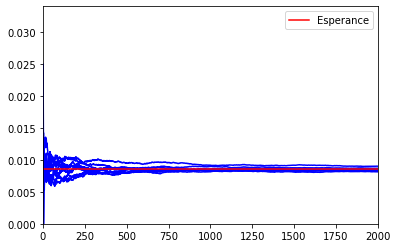

In [5]:
################################################
# Trajectoires de l'estimateur empirique
################################################
M = 10

################################
# Completer avec M tirages de l'estimateur d'importance
# J_n pour n = 1,...,N
Z = np.random.normal(theta,1,(M,N))
#Z_M = integrand1(Z)

J_n = np.zeros((M,N))
for i in range(0,M):
    J_n[i,:] = np.cumsum(g(Z[i,:])*np.exp(-theta*Z[i,:]+theta**2/2))/range(1,N+1)

# Affichage des 10 trajectoires
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(integers1toN, J_n.T, color="b")

ax.set_xlim(0, N)
ax.set_ylim(0, 4*Esp_gY)
ax.axhline(Esp_gY, color="r", label="Esperance")
ax.legend(loc="best")
plt.show()

In [6]:
############################################
# On peut aussi calculer la moyenne et la variance
# theoriques de l'estimateur d'importance par
# quadrature numerique (avec scipy.integrate.quad )

def imp_func(z):
    return np.exp(-theta*z+theta**2/2)
    
def integrand_theta(z):
    return g(z)*densiteGaussienne(z)*imp_func(z)

def integrand_theta_sq(z):
    return g(z)**2*densiteGaussienne(z)*imp_func(z)**2

# Moyenne et variance theoriques de l'estimateur d'importance 
Esp_g_theta = spint.quad(integrand_theta,-10., 10.)[0] 
Var_g_theta = spint.quad(integrand_theta_sq,-10., 10.)[0]-(spint.quad(integrand_theta,-10., 10.)[0])**2
 
print("Esp_g_theta = %1.4f  Var_g_theta = %1.6f \n" %(Esp_g_theta, Var_g_theta))

Esp_g_theta = 0.0004  Var_g_theta = 0.000008 



####  Question 3: 
Comparer graphiquement les histogrammes des erreurs des estimateurs $I_n$ et $J_n$, pour $n=1000$.

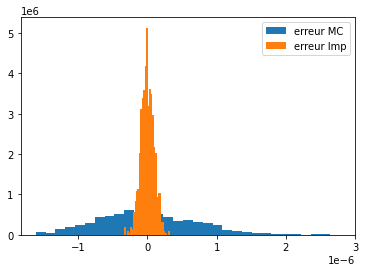

In [7]:
M = 1000 # Nombre de tirages
N = 1000 # Taille echantillon

############################################
# Completer avec M x N tirages  
# a partir de la loi N(0,1)
# et a partir de la loi N(2,1)
X_1 = np.random.normal(0,1,(M,N))
X_2 = np.random.normal(2,1,(M,N))

GY = g(X_1)
GY_importance = g(X_2)*np.exp(-2*X_2+2)

############################################
# Completer avec le calcul des erreurs des
# deux estimateurs (échantillons de taille M)

erreurMC = np.zeros((M,1))
for i in range(0,M):
    erreurMC[i] = np.mean(GY[i])-Esp_gY
    
erreurImportance = np.zeros((M,1))
for i in range(0,M):
    erreurImportance[i] = np.mean(GY_importance[i])-Esp_gY #should be Esp_g_theta

# Affichage de l'histogramme des erreurs
plt.hist(np.sqrt(var/M)*erreurMC , density="True", bins=int(np.sqrt(M)), label="erreur MC")

plt.hist(np.sqrt(var/M)*erreurImportance, density="True", bins=int(np.sqrt(M)), label="erreur Imp")

plt.legend(loc="best")
plt.show()